# Notebook to conduct EDA on EPA - Expected Points

In [39]:
import pandas as pd
import os
import re
import matplotlib

In [14]:
# set data directiory and get list of files there
data_dir = '../data/raw/'
data_files = os.listdir(data_dir)

In [ ]:
# params for file read

week_cols = ['time','']

In [26]:
# read the data

# read and union the tracking data
week_df_list = []
r = re.compile("week")
for file in list(filter(r.match, data_files)):
    df_file = pd.read_csv(data_dir + file, parse_dates = ['time'], nrows = 1000)
    df_file['source_file'] = file
    week_df_list.append(df_file)

# combine all files in df list
weeks = pd.concat(week_df_list)
    

# read in the games data
games = pd.read_csv(data_dir + 'games.csv')

# read in the players data
players = pd.read_csv(data_dir + 'players.csv')

# read in the plays data
plays = pd.read_csv(data_dir + 'plays.csv')


<AxesSubplot:>

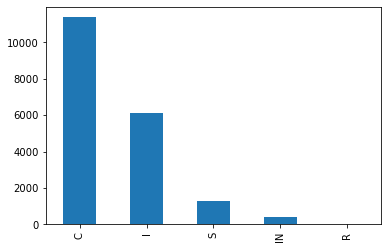

In [53]:
plays['passResult'].value_counts().plot.bar()

<AxesSubplot:xlabel='passResult'>

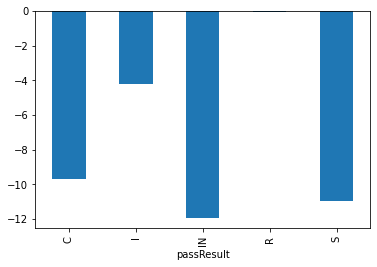

In [54]:
plays.groupby('passResult')['epa'].min().plot.bar()

<AxesSubplot:xlabel='playResult', ylabel='epa'>

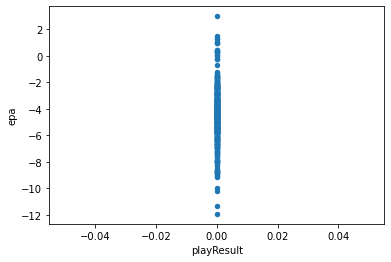

In [56]:
plays[plays['passResult'] == 'IN'].plot.scatter(x = 'playResult', y = 'epa')